In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

2021-12-10 16:53:01.399742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-10 16:53:01.399759: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Notebook run using keras: 2.7.0


## Import InceptionNet model

In [2]:
inet_model = inc_net.InceptionV3()

2021-12-10 16:53:03.418782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 16:53:03.419118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-10 16:53:03.419149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-10 16:53:03.419171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-10 16:53:03.420332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n01677366', 'common_iguana', 0.8835054)
('n01693334', 'green_lizard', 0.06051452)
('n01688243', 'frilled_lizard', 0.0074986913)
('n01687978', 'agama', 0.0060894145)
('n01685808', 'whiptail', 0.002140361)


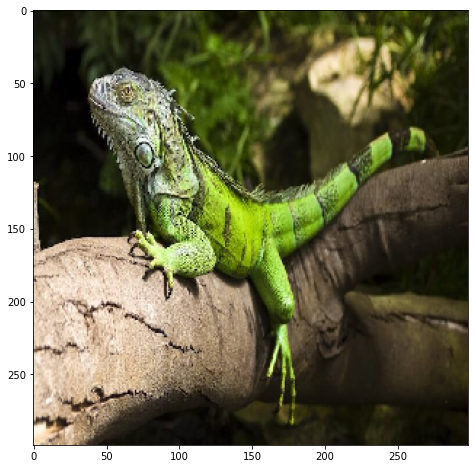

In [4]:
images = transform_img_fn([os.path.join('data','iguana.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.figure(figsize = (8,8))
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

## See the segmentations 

In [6]:
from skimage.segmentation import quickshift
from skimage.segmentation import mark_boundaries

Segmentation on original image
# of segmentations: 218


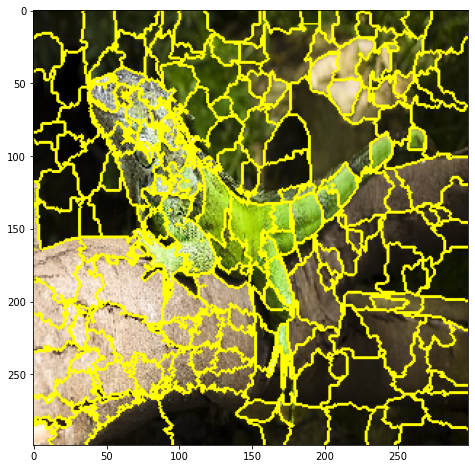

In [7]:
img = images[0]
segs = quickshift(img / 2 + 0.5, kernel_size = 4, max_dist = 6, ratio=0.3, random_seed = 1234)
print("Segmentation on original image")

print("# of segmentations: " + str(len(np.unique(segs))))
plt.figure(figsize = (8,8))
plt.imshow(mark_boundaries(img / 2 + 0.5, segs))

## Get masked segmentations

In [9]:
preds = inet_model.predict(images)

In [26]:
decode_predictions(preds, top=10)

[[('n01677366', 'common_iguana', 0.8835054),
  ('n01693334', 'green_lizard', 0.06051452),
  ('n01688243', 'frilled_lizard', 0.0074986913),
  ('n01687978', 'agama', 0.0060894145),
  ('n01685808', 'whiptail', 0.002140361),
  ('n01694178', 'African_chameleon', 0.0017882132),
  ('n01689811', 'alligator_lizard', 0.0016458464),
  ('n01675722', 'banded_gecko', 0.0014911045),
  ('n01682714', 'American_chameleon', 0.0008235352),
  ('n01695060', 'Komodo_dragon', 0.00052606466)]]

In [11]:
len(preds[0])

1000

In [18]:
import json
with open('data/imagenet_class_index.json') as json_file:
    idx_to_cls = json.load(json_file)
    idx_to_cls = {int(k):v for k,v in idx_to_cls.items()}

In [21]:
top_5_idx = list(np.argsort(preds[0])[-5:])
top_5_idx.reverse()

In [24]:
for idx in top_5_idx:
    print(idx_to_cls[idx])
    print(preds[0][idx])

['n01677366', 'common_iguana']
0.8835054
['n01693334', 'green_lizard']
0.06051452
['n01688243', 'frilled_lizard']
0.0074986913
['n01687978', 'agama']
0.0060894145
['n01685808', 'whiptail']
0.002140361
